# Timing statistics

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

In [12]:
table = pd.read_json("recontiming128-1024.json", orient="index")
table.head()

ValueError: Expected object or value

In [13]:
table['Total time']=np.nan
table['Time/slice']=np.nan
table['size']=np.nan
table['Total GUPS']=np.nan
table['GUPS/slice']=np.nan


for ind in table.index: 
    table['Total time'][ind] = table['timing'][ind]['total'] 
    datadict = table['data'][ind] 
    sum=1
    for key in datadict :
        sum = sum * datadict[key]

    table['size'][ind]       = datadict['sizeu']  
    table['Time/slice'][ind] = table['Total time'][ind]/datadict['sizeu'] 
    table['Total GUPS'][ind] = sum/table['Total time'][ind]/1e9
    table['GUPS/slice'][ind] = table['Total GUPS'][ind]/datadict['sizez']**2
        

C:\Users\ander\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\ander\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\ander\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\

In [14]:
table.head()

,data,timing,Total time,Time/slice,size,Total GUPS,GUPS/slice
2021-02-08 13:50:06,"{'projections': 128, 'sizeu': 128, 'sizev': 12...","{'FullLogNorm': 2.5266, 'MorphSpotClean': 85.6...",6089.34,47.572969,128.0,0.722253,0.000044
2021-02-08 13:50:12,"{'projections': 128, 'sizeu': 128, 'sizev': 12...","{'FullLogNorm': 2.7878, 'MorphSpotClean': 103....",5539.84,43.280000,128.0,0.793894,0.000048
2021-02-08 13:50:18,"{'projections': 128, 'sizeu': 128, 'sizev': 12...","{'FullLogNorm': 3.0385, 'MorphSpotClean': 107....",5608.43,43.815859,128.0,0.784185,0.000048
2021-02-08 13:50:23,"{'projections': 128, 'sizeu': 128, 'sizev': 12...","{'FullLogNorm': 2.8213, 'MorphSpotClean': 99.7...",5601.16,43.759062,128.0,0.785203,0.000048
2021-02-08 13:50:29,"{'projections': 128, 'sizeu': 128, 'sizev': 12...","{'FullLogNorm': 2.7232000000000003, 'MorphSpot...",5547.49,43.339766,128.0,0.792799,0.000048


In [15]:
sizes = []
avgTotalTime = []
stdTotalTime = []
avgSliceTime = []
stdSliceTime = []
avgGUPS = []

scale = 1000
for s in table['size'].unique() :
    sizes.append(s)
    avgTotalTime.append(table[table['size']==s]['Total time'].mean()/scale)
    stdTotalTime.append(table[table['size']==s]['Total time'].std()/scale)
    avgSliceTime.append(table[table['size']==s]['Time/slice'].mean()/scale)
    stdSliceTime.append(table[table['size']==s]['Time/slice'].std()/scale)
    avgGUPS.append(table[table['size']==s]['Total GUPS'].mean())

data = {'size': sizes, 
        'Total time': avgTotalTime, 
        'std Total time': stdTotalTime, 
        'Time/slice': avgSliceTime, 
        'std Time/slice': stdSliceTime,
       'GUPS': avgGUPS}

timings = pd.DataFrame.from_dict(data).sort_values('size')

In [16]:
timings

,size,Total time,std Total time,Time/slice,std Time/slice,GUPS
0,128.0,5.617045,0.167905,0.043883,0.001312,0.783570
1,256.0,13.886830,0.142442,0.054245,0.000556,20.271085
2,384.0,27.250870,0.839216,0.070966,0.002185,117.747435
3,512.0,47.194460,1.073440,0.092177,0.002097,381.874123
4,768.0,123.481600,2.728090,0.160783,0.003552,1662.440668
5,1024.0,263.010000,2.098288,0.256846,0.002049,4383.812743


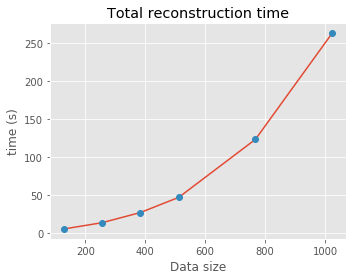

In [17]:
plt.figure(figsize=(5,4))
plt.plot(timings['size'],timings['Total time'])
plt.plot(timings['size'],timings['Total time'],'o')
plt.xlabel('Data size')
plt.ylabel('time (s)')
plt.title('Total reconstruction time');
plt.tight_layout()
plt.savefig('totaltime.svg')
plt.savefig('totaltime.png',dpi=300)

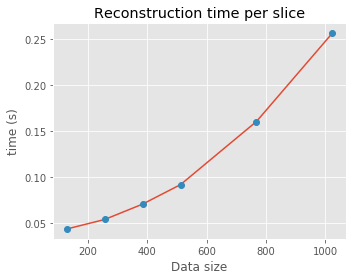

In [18]:
plt.figure(figsize=(5,4))
plt.plot(timings['size'],timings['Time/slice'])
plt.plot(timings['size'],timings['Time/slice'],'o')
plt.xlabel('Data size')
plt.ylabel('time (s)')
plt.title('Reconstruction time per slice');
plt.tight_layout()
plt.savefig('timeperslice.svg')
plt.savefig('timeperslice.png',dpi=300)

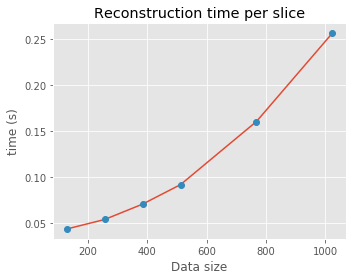

In [19]:
plt.figure(figsize=(5,4))
plt.plot(timings['size'],timings['Time/slice'])
plt.plot(timings['size'],timings['Time/slice'],'o')
plt.xlabel('Data size')
plt.ylabel('time (s)')
plt.title('Reconstruction time per slice');
plt.tight_layout()
plt.savefig('timeperslice.svg')
plt.savefig('timeperslice.png',dpi=300)

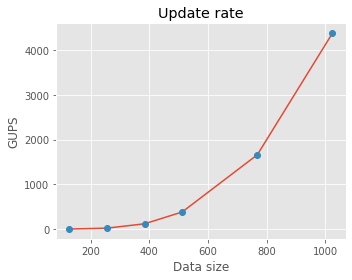

In [20]:
plt.figure(figsize=(5,4))
plt.plot(timings['size'],timings['GUPS'])
plt.plot(timings['size'],timings['GUPS'],'o')
plt.xlabel('Data size')
plt.ylabel('GUPS')
plt.title('Update rate');
plt.tight_layout()
plt.savefig('GUPS.svg')
plt.savefig('GUPS.png',dpi=300)